## EDA & Preprocessing

### Importieren wichtiger Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer


In [2]:
# CSV-Datei in pandas DataFrame laden
df = pd.read_csv('data/movies_2015_2023_cleaned.csv')
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Uri: The Surgical Strike,2019,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420,76.363
1,Attack,2022,Indisch,"With the Parliament under siege, India’s first...",6.735,204,68.613
2,Jawan,2023,Indisch,"An emotional journey of a prison warden, drive...",7.200,241,58.234
3,Tumbbad,2018,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241,57.667
4,Animal,2023,Indisch,The hardened son of a powerful industrialist r...,6.466,104,40.951
...,...,...,...,...,...,...,...
10574,Odissea nell'ospizio,2019,Italienisch,Four sixty-something disgraced comedians - who...,5.500,1,0.841
10575,Walls,2023,Italienisch,"For her debut film, model-actor turned filmmak...",6.100,4,0.840
10576,L'ultima bottega,2023,Italienisch,An almost eighty -year -old man works in his w...,0.000,0,0.839
10577,When Nuvolari Runs: The Flying Mantuan,2018,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6,0.838


In [3]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,release_year,vote_average,vote_count,popularity
count,10579.000000,10579.000000,10579.000000,10579.000000
mean,2019.592211,5.387338,502.492863,11.590713
std,2.684923,2.508690,1846.978829,22.661944
min,2015.000000,0.000000,0.000000,0.109000
25%,2017.000000,5.000000,2.000000,2.195000
50%,2020.000000,6.100000,23.000000,4.434000
75%,2022.000000,6.900000,148.000000,11.118000
max,2023.000000,10.000000,30775.000000,449.330000


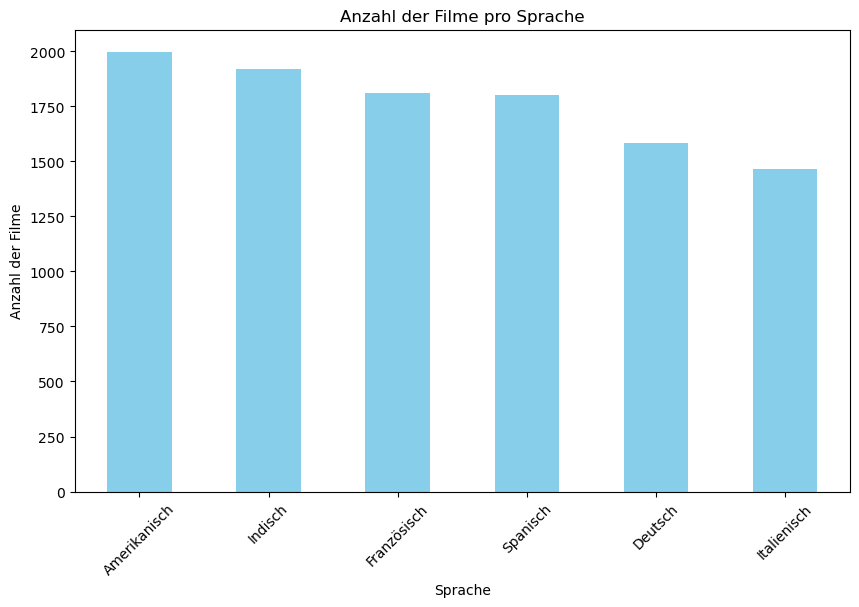

In [4]:
# Zähle die Anzahl der Filme pro Sprache
language_counts = df['language'].value_counts()

# Visualisiere die Anzahl der Filme pro Sprache als Balkendiagramm
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Anzahl der Filme pro Sprache')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.show()


C:\Users\rawan\AppData\Local\Temp\ipykernel_12228\201898807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=df, palette='viridis')


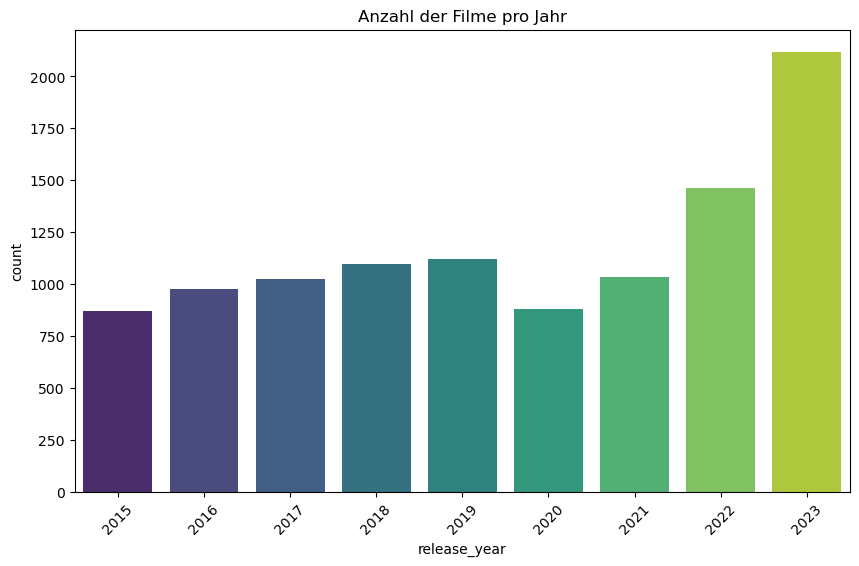

In [5]:
# Anzahl der Filme pro Jahr (Trend)
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=df, palette='viridis')
plt.title('Anzahl der Filme pro Jahr')
plt.xticks(rotation=45)
plt.show()

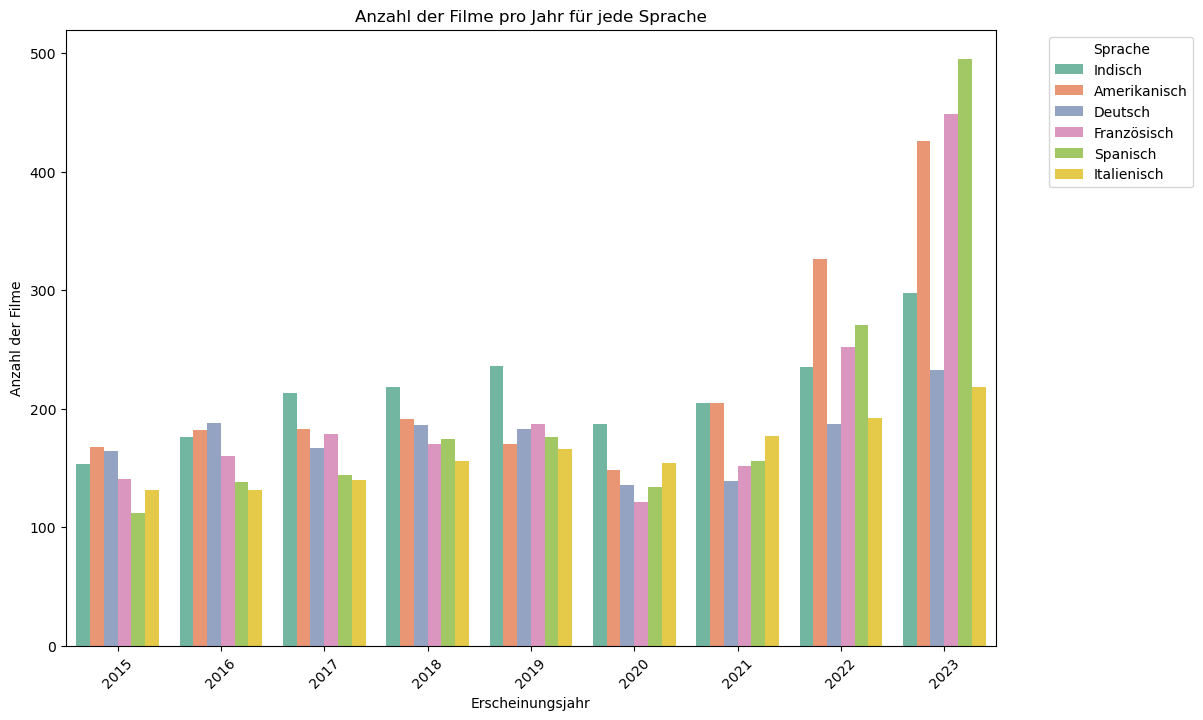

In [6]:
# Anzahl der Filme pro Jahr für jede Sprache plotten
plt.figure(figsize=(12, 8))

# Wir verwenden eine Palette für die Farben und plotten die Filme pro Jahr und Sprache
sns.countplot(x='release_year', hue='language', data=df, palette='Set2')

plt.title('Anzahl der Filme pro Jahr für jede Sprache')
plt.xlabel('Erscheinungsjahr')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.legend(title='Sprache', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [7]:
# Find the movies with the highest popularity
most_popular_movies = df.sort_values(by='popularity', ascending=False).head(10)

# Display the top 10 most popular movies
most_popular_movies[['title', 'release_year', 'popularity']]


,title,release_year,popularity
1921,The Devil Comes at Night,2023,449.330
1922,The Quest for Tom Sawyer's Gold,2023,390.357
1923,Hunting Games,2023,378.476
1924,Avengers: Infinity War,2018,366.595
7314,My Fault,2023,342.682
1925,Transformers: Rise of the Beasts,2023,322.910
1926,Freddy's Fridays,2023,307.530
1927,Migration,2023,305.692
1928,Joker,2019,303.567
5503,Mayhem!,2023,281.494


In [8]:
# Group the data by language and calculate some summary statistics for each language
movies_by_language = df.groupby('language').agg(
    average_rating=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum'),
    average_popularity=('popularity', 'mean'),
    movie_count=('title', 'count')
).sort_values(by='movie_count', ascending=False)

# Display the analysis by language
print(movies_by_language)


              average_rating  total_votes  average_popularity  movie_count
language                                                                  
Amerikanisch        6.532109      4679002           38.799922         1999
Indisch             3.902430        32186            2.638342         1921
Französisch         5.936341       273370            8.450816         1811
Spanisch            5.527846       151927            7.394741         1800
Deutsch             5.246836        52343            3.888979         1583
Italienisch         5.072914       127044            3.561528         1465


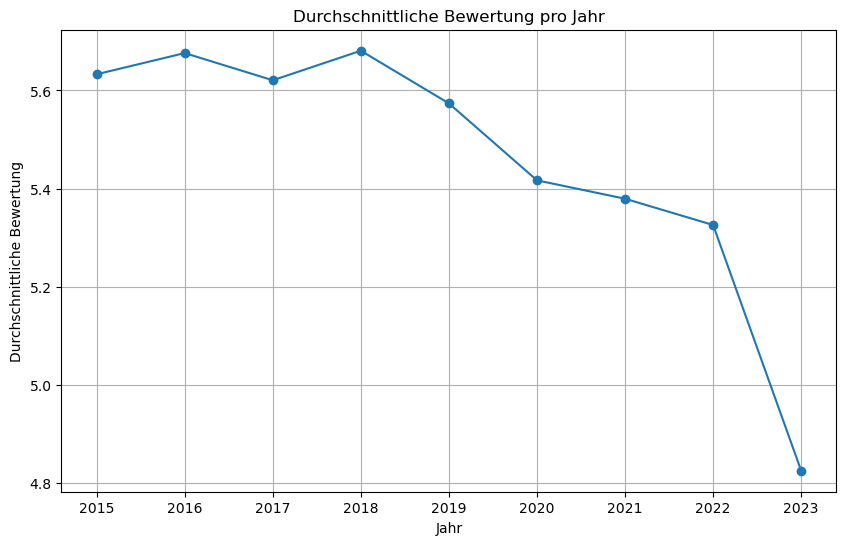

In [9]:
# Group the data by release year and calculate the average rating for each year
average_rating_by_year = df.groupby('release_year')['vote_average'].mean().reset_index()

# Plot the average rating per year
plt.figure(figsize=(10,6))
plt.plot(average_rating_by_year['release_year'], average_rating_by_year['vote_average'], marker='o')

# Customize the plot
plt.title('Durchschnittliche Bewertung pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Bewertung')
plt.grid(True)

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

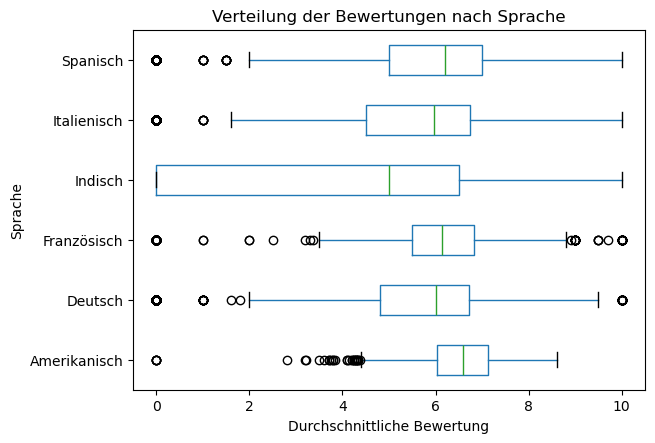

In [10]:
# Boxplot for vote_average by language to visualize the distribution of ratings per language
plt.figure(figsize=(10,6))
df.boxplot(column='vote_average', by='language', grid=False, vert=False)

# Customize the plot
plt.title('Verteilung der Bewertungen nach Sprache')
plt.suptitle('')
plt.xlabel('Durchschnittliche Bewertung')
plt.ylabel('Sprache')

# Show the plot
plt.show()


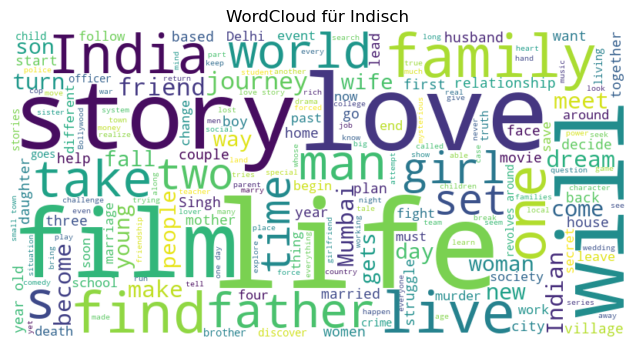

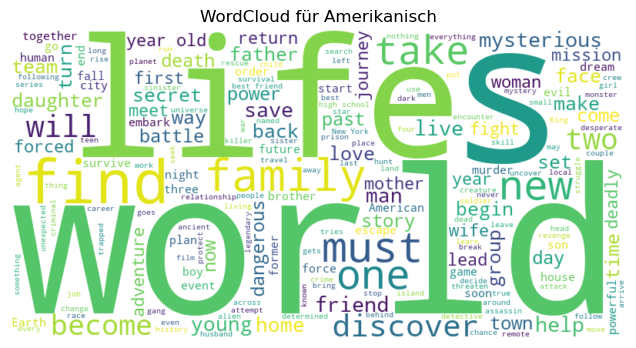

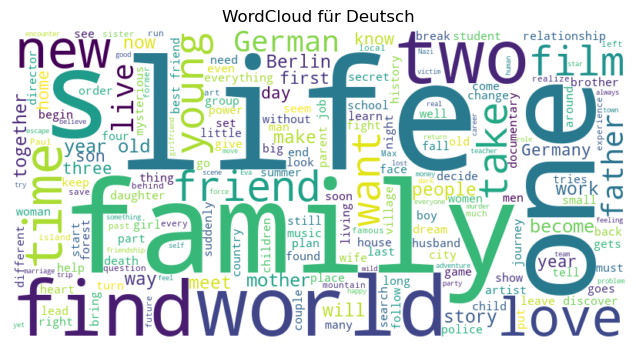

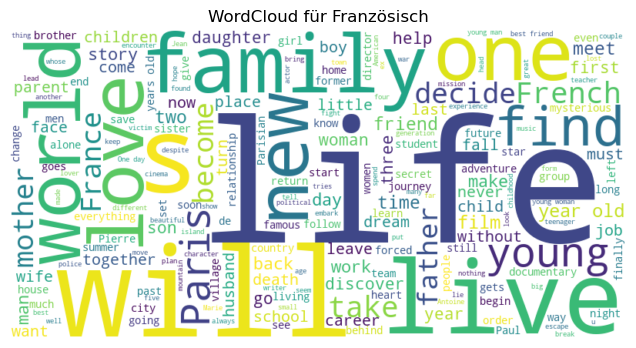

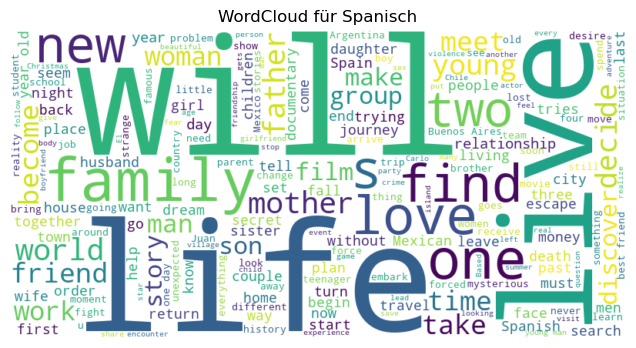

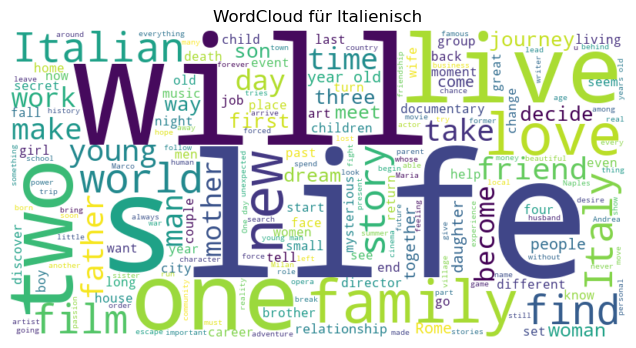

In [11]:
# Funktion zur Erstellung einer WordCloud für eine bestimmte Sprache
def create_wordcloud(language_data, language_name):
    text = ' '.join(language_data.dropna())  # Kombiniere alle Texte der Beschreibungen zu einem String
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # WordCloud anzeigen
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud für {language_name}')
    plt.show()

# Gruppiere die Daten nach Sprache und erstelle für jede Sprache eine WordCloud
languages = df['language'].unique()
for language in languages:
    language_data = df[df['language'] == language]['overview']
    create_wordcloud(language_data, language)


In [12]:
# Stoppwörter auf Deutsch und Englisch laden (nötigenfalls mit `nltk.download('stopwords')` herunterladen)
stop_words = set(stopwords.words('german')).union(set(stopwords.words('english')))

# Funktion zur Bereinigung des Texts und Zählung der Wörter
def clean_and_count_words(texts):
    all_words = []
    for text in texts.dropna():
        # Entferne Sonderzeichen und Zahlen, wandeln in Kleinbuchstaben
        words = re.findall(r'\b\w+\b', text.lower())
        # Füge nur Wörter hinzu, die keine Stoppwörter sind
        filtered_words = [word for word in words if word not in stop_words]
        all_words.extend(filtered_words)
    
    # Zähle die Wörter
    return Counter(all_words)

# Wörter aus den Beschreibungen zählen
word_counts = clean_and_count_words(df['overview'])

# Die 10 häufigsten Wörter anzeigen
print(word_counts.most_common(10))


[('life', 2274), ('one', 1601), ('young', 1423), ('family', 1392), ('world', 1238), ('love', 1229), ('old', 1223), ('two', 1157), ('new', 1130), ('years', 1011)]


In [13]:
# Funktion zur Bereinigung des Texts und Zählung der Wörter
def clean_and_count_words(texts):
    all_words = []
    for text in texts.dropna():
        # Entferne Sonderzeichen und Zahlen, wandeln in Kleinbuchstaben
        words = re.findall(r'\b\w+\b', text.lower())
        # Füge nur Wörter hinzu, die keine Stoppwörter sind
        filtered_words = [word for word in words if word not in stop_words]
        all_words.extend(filtered_words)
    
    # Zähle die Wörter
    return Counter(all_words)

# Wörter nach Sprache zählen
word_counts_by_language = {}

languages = df['language'].unique()
for language in languages:
    language_data = df[df['language'] == language]['overview']
    word_counts_by_language[language] = clean_and_count_words(language_data)

# Die häufigsten Wörter für jede Sprache anzeigen
for language, counts in word_counts_by_language.items():
    print(f"\nHäufigste Wörter in {language}:")
    print(counts.most_common(10))



Häufigste Wörter in Indisch:
[('life', 464), ('love', 364), ('story', 346), ('film', 335), ('one', 250), ('family', 235), ('india', 231), ('young', 192), ('two', 186), ('girl', 164)]

Häufigste Wörter in Amerikanisch:
[('world', 307), ('new', 282), ('life', 272), ('must', 258), ('family', 256), ('young', 235), ('one', 219), ('two', 155), ('find', 154), ('home', 143)]

Häufigste Wörter in Deutsch:
[('life', 369), ('one', 269), ('old', 245), ('family', 228), ('world', 221), ('young', 220), ('two', 204), ('time', 192), ('year', 190), ('new', 186)]

Häufigste Wörter in Französisch:
[('life', 441), ('one', 326), ('young', 318), ('old', 285), ('years', 268), ('family', 251), ('new', 230), ('world', 217), ('love', 212), ('year', 212)]

Häufigste Wörter in Spanisch:
[('life', 356), ('one', 267), ('young', 244), ('family', 235), ('years', 209), ('love', 197), ('old', 189), ('two', 181), ('father', 171), ('lives', 167)]

Häufigste Wörter in Italienisch:
[('life', 372), ('one', 270), ('two', 225

## Preprocessing

In [14]:
# 1. Textbereinigung: Entfernen von Sonderzeichen, Zahlen und Umwandlung in Kleinbuchstaben
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Entferne Zahlen
    text = re.sub(r'\W', ' ', text)  # Entferne Sonderzeichen
    text = text.lower()  # In Kleinbuchstaben umwandeln
    text = text.strip()  # Entferne führende und nachfolgende Leerzeichen
    return text

# 2. Tokenisierung und Stoppwörter entfernen
stop_words = set(stopwords.words('english'))  # Stoppwörter auf Englisch (du kannst auch deutsche hinzufügen)
def tokenize_and_remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# 3. (Optional) Stemming oder Lemmatization
stemmer = PorterStemmer()
def stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Anwendung der Preprocessing-Schritte auf die "overview"-Spalte
df['cleaned_overview'] = df['overview'].dropna().apply(clean_text)
df['cleaned_overview'] = df['cleaned_overview'].apply(tokenize_and_remove_stopwords)
df['cleaned_overview'] = df['cleaned_overview'].apply(stemming)

# 4. Umwandlung in numerische Form mit TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Maximal 5000 häufigste Features verwenden
X = tfidf_vectorizer.fit_transform(df['cleaned_overview'].dropna())

# Die transformierten Daten sind nun bereit für ML-Modelle


In [15]:
df

,title,release_year,language,overview,vote_average,vote_count,popularity,cleaned_overview
0,Uri: The Surgical Strike,2019,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420,76.363,follow roguish terrorist attack uri armi base ...
1,Attack,2022,Indisch,"With the Parliament under siege, India’s first...",6.735,204,68.613,parliament sieg india first super soldier arju...
2,Jawan,2023,Indisch,"An emotional journey of a prison warden, drive...",7.200,241,58.234,emot journey prison warden driven person vende...
3,Tumbbad,2018,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241,57.667,india outskirt tumbbad curs villag alway rain ...
4,Animal,2023,Indisch,The hardened son of a powerful industrialist r...,6.466,104,40.951,harden son power industrialist return home yea...
...,...,...,...,...,...,...,...,...
10574,Odissea nell'ospizio,2019,Italienisch,Four sixty-something disgraced comedians - who...,5.500,1,0.841,four sixti someth disgrac comedian use work to...
10575,Walls,2023,Italienisch,"For her debut film, model-actor turned filmmak...",6.100,4,0.840,debut film model actor turn filmmak kasia smut...
10576,L'ultima bottega,2023,Italienisch,An almost eighty -year -old man works in his w...,0.000,0,0.839,almost eighti year old man work workshop made ...
10577,When Nuvolari Runs: The Flying Mantuan,2018,Italienisch,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6,0.838,tazio giorgio nuvolari novemb august italian r...
